In [1]:
#This script refer from :https://blog.manash.me/multi-task-learning-in-keras-implementation-of-multi-task-classification-loss-f1d42da5c3f6
#This is a practic script for learning Keras
#20190121

In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
file = h5py.File("./dataset.h5")

In [4]:
x = file['x'].value

c:\users\shengwei\appdata\local\programs\python\python36\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
type(x[0]) #picture data with 2000 training instance, 3 kind of color for mixing a 100 x 100 picture

numpy.ndarray

In [6]:
type(x)

numpy.ndarray

In [7]:
y = file['y'].value

In [8]:
y.shape # the answer is a one hot encoded vector

(2000, 5)

In [9]:
y[0]

array([1, 0, 0, 0, 0], dtype=int64)

In [10]:
#This is the full function for loading this data
def load():
    f = h5py.File("./dataset.h5")
    x = f['x'].value
    y = f['y'].value
    f.close()
    
    x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
    
    # Making the data channel last
    # 部分圖片的儲存是 (channel ,[height][width] ) 的方法儲存，為了修正，需要調用rollaxis
    x_train = np.rollaxis(x_train, 1, 4)
    x_test = np.rollaxis(x_test, 1, 4)
    
    # Normalizing data
    x_train = x_train  / 255.0
    x_test = x_test / 255.0
   
    return x_train, x_test, y_train, y_test

In [11]:
x_train, x_test, y_train, y_test = load()

In [12]:
x_train.shape

(1600, 100, 100, 3)

In [13]:
x_train[0].shape

(100, 100, 3)

In [14]:
y_train.shape

(1600, 5)

In [15]:
for row in x_train[0]:
    print(row,row.shape)
    
    break

[[0.05882353 0.27058824 0.58823529]
 [0.0745098  0.29411765 0.61176471]
 [0.05882353 0.29803922 0.61176471]
 [0.05490196 0.31372549 0.62352941]
 [0.06666667 0.3254902  0.62352941]
 [0.08627451 0.34901961 0.64313725]
 [0.07843137 0.35686275 0.64705882]
 [0.07843137 0.36470588 0.65490196]
 [0.08235294 0.37254902 0.67843137]
 [0.09411765 0.38823529 0.69411765]
 [0.09803922 0.39215686 0.69803922]
 [0.10588235 0.4        0.70588235]
 [0.11372549 0.40392157 0.71372549]
 [0.12156863 0.41176471 0.7254902 ]
 [0.1254902  0.42352941 0.73333333]
 [0.12156863 0.43137255 0.74117647]
 [0.12941176 0.43921569 0.75686275]
 [0.14117647 0.45098039 0.79215686]
 [0.14117647 0.45490196 0.79607843]
 [0.1372549  0.4627451  0.8       ]
 [0.14117647 0.4745098  0.81176471]
 [0.15686275 0.49019608 0.82745098]
 [0.16078431 0.50196078 0.84705882]
 [0.15294118 0.49411765 0.85098039]
 [0.15686275 0.50980392 0.86666667]
 [0.14509804 0.50980392 0.8745098 ]
 [0.14509804 0.51764706 0.88235294]
 [0.14117647 0.51764706 0.88

In [16]:
import keras.backend as K
def multitask_loss(y_true, y_pred):
# Avoid divide by 0
    #keras.backend.clip(x, min_value, max_value)
        # x is a tensor
        # this function will return a tensor
        # clip will made the value in tensor within min and max value
        # use it with epsilon() can help make the value within 0~1 but not 0, so it can avoid divide by 0
    #keras.backend.epsilon()
        #return a float which is very small 
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
# Multi-task loss
    # the formule shows below
    return K.mean(K.sum(- y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred), axis=1))

Using TensorFlow backend.


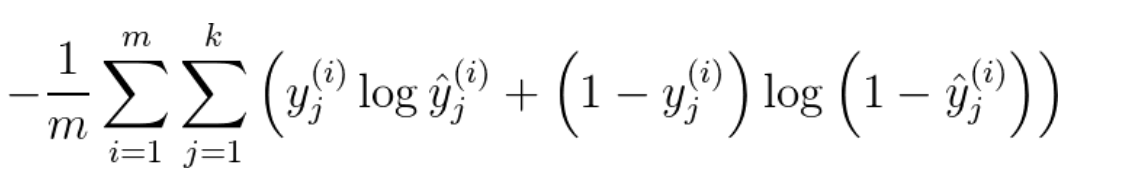

In [17]:
# here is the example 
# keras.backend seems like use tensorflow function

import tensorflow as tf
sess = tf.Session()
K.set_session(sess)
x = K.variable(-8)
y = K.variable(10)
z = K.variable(0.8)
init_op = tf.global_variables_initializer()
sess.run(init_op)
print(sess.run(K.clip(x,K.epsilon(),1 - K.epsilon())))
print(sess.run(K.clip(y,K.epsilon(),1 - K.epsilon())))
print(sess.run(K.clip(z,K.epsilon(),1 - K.epsilon())))

1e-07
0.9999999
0.8


In [18]:
from keras.models import Sequential # for buliding the model
from keras.layers import Dense, Dropout, Flatten # for fullconnection layers
from keras.layers import Conv2D, MaxPooling2D, Activation # for CNN

In [19]:
batch_size = 100
num_classes = 5
epochs = 10

In [20]:
img_rows, img_cols = 100, 100
channels = 3

In [21]:
#init model
model = Sequential()
#C layer kernel3x3
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',input_shape=(img_rows, img_cols, channels)))
#Activation function
model.add(Activation('relu'))
#C layer kernel3x3
model.add(Conv2D(32, (3, 3)))
#Activation function
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout
model.add(Dropout(0.25))

In [22]:
model.add(Conv2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [23]:
#flatten the feature map for fully-connection layer input
model.add(Flatten())
#FC-layer
model.add(Dense(512))
#FC-activation
model.add(Activation('relu'))
#dropout
model.add(Dropout(0.5))
#FC-layer for class
model.add(Dense(num_classes))
#sigmoid activation
model.add(Activation('sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
#multi-task-loss
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 83s 52ms/step - loss: 3.3437 - acc: 0.2694 - val_loss: 2.4435 - val_acc: 0.3650
roc_auc: 0.76442 - roc_auc_val: 0.74964 - norm_gini: 0.52884 - norm_gini_val: 0.49927          
Epoch 2/10
1600/1600 [==============================] - 83s 52ms/step - loss: 2.3098 - acc: 0.4319 - val_loss: 2.2577 - val_acc: 0.4775
roc_auc: 0.82917 - roc_auc_val: 0.8235 - norm_gini: 0.65835 - norm_gini_val: 0.64699          
Epoch 3/10
1600/1600 [==============================] - 88s 55ms/step - loss: 2.0710 - acc: 0.5237 - val_loss: 1.9467 - val_acc: 0.5925
roc_auc: 0.87188 - roc_auc_val: 0.86169 - norm_gini: 0.74377 - norm_gini_val: 0.72338          
Epoch 4/10
1600/1600 [==============================] - 83s 52ms/step - loss: 1.8378 - acc: 0.5912 - val_loss: 1.8643 - val_acc: 0.6075
roc_auc: 0.8885 - roc_auc_val: 0.8768 - norm_gini: 0.77699 - norm_gini_val: 0.7536          
Epoch 5/10
1600/1600 [=======

In [30]:
#binary_crossentropy result
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 90s 56ms/step - loss: 0.2890 - acc: 0.8760 - val_loss: 0.3436 - val_acc: 0.8530
roc_auc: 0.94412 - roc_auc_val: 0.89419 - norm_gini: 0.88823 - norm_gini_val: 0.78838          
Epoch 2/10
1600/1600 [==============================] - 86s 54ms/step - loss: 0.2556 - acc: 0.8921 - val_loss: 0.3374 - val_acc: 0.8670
roc_auc: 0.95696 - roc_auc_val: 0.89874 - norm_gini: 0.91391 - norm_gini_val: 0.79747          
Epoch 3/10
1600/1600 [==============================] - 85s 53ms/step - loss: 0.2375 - acc: 0.9044 - val_loss: 0.3163 - val_acc: 0.8695
roc_auc: 0.96443 - roc_auc_val: 0.90351 - norm_gini: 0.92886 - norm_gini_val: 0.80701          
Epoch 4/10
 700/1600 [============>.................] - ETA: 46s - loss: 0.2206 - acc: 0.9097

KeyboardInterrupt: 

In [39]:
(0.8825+0.8350+0.7975+0.8975+0.8475)/5

0.852

In [27]:
#this auc fumction works
#add this in model.fit()  :callbacks=callbacks
from keras.callbacks import  Callback
from sklearn.metrics import  roc_auc_score
class roc_auc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict_proba(self.x, verbose=0)
        roc = roc_auc_score(self.y, y_pred)
        logs['roc_auc'] = roc_auc_score(self.y, y_pred)
        logs['norm_gini'] = ( roc_auc_score(self.y, y_pred) * 2 ) - 1

        y_pred_val = self.model.predict_proba(self.x_val, verbose=0)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)
        logs['norm_gini_val'] = ( roc_auc_score(self.y_val, y_pred_val) * 2 ) - 1

        print('\rroc_auc: %s - roc_auc_val: %s - norm_gini: %s - norm_gini_val: %s' % (str(round(roc,5)),str(round(roc_val,5)),str(round((roc*2-1),5)),str(round((roc_val*2-1),5))), end=10*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return
callbacks = [roc_auc_callback(training_data=(x_train, y_train),validation_data=(x_test, y_test))]

But this model is not what i wish,
I need a model like this
https://dam-prod.media.mit.edu/thumb/2017/12/12/Screen%20Shot%202017-12-12%20at%2011.50.03%20AM.png.1400x1400.png


Here are some hint for buliding this model

x = Input(shape=(n, ))
shared = Dense(32)(x)
sub1 = Dense(16)(shared)
sub2 = Dense(16)(shared)
sub3 = Dense(16)(shared)
out1 = Dense(1)(sub1)
out2 = Dense(1)(sub2)
out3 = Dense(1)(sub3)

model = Model(inputs=x, outputs=[out1, out2, out3])

reference : https://stackoverflow.com/questions/48615003/multi-task-learning-in-keras

In [ ]:
sharedLSTM1 = LSTM((data.shape[1]), return_sequences=True)
sharedLSTM2 = LSTM(data.shape[1])
def createModel(dropoutRate=0.0, numNeurons=40, optimizer='adam'):
    inputLayer = Input(shape=(timesteps, data.shape[1]))
    sharedLSTM1Instance = sharedLSTM1(inputLayer)
    sharedLSTM2Instance =  sharedLSTM2(sharedLSTM1Instance)
    dropoutLayer = Dropout(dropoutRate)(sharedLSTM2Instance)
    denseLayer1 = Dense(numNeurons)(dropoutLayer)
    denseLayer2 = Dense(numNeurons)(denseLayer1)
    outputLayer = Dense(1, activation='sigmoid')(denseLayer2)
    return (inputLayer, outputLayer)

inputLayer1, outputLayer1 = createModel()
inputLayer2, outputLayer2 = createModel()
model = Model(inputs=[inputLayer1, inputLayer2], outputs=[outputLayer1, outputLayer2])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Here is the official ducument 
:https://keras.io/getting-started/functional-api-guide/